# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Importing the training set

In [23]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv', thousands=',') # Add thousands=',' to handle comma as thousands separator
training_set = dataset_train.iloc[:, 1:5].values

### Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [25]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, :])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [26]:
print(X_train.shape)
print(y_train.shape)

(1198, 60, 4)
(1198,)


### Reshaping

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 4))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [28]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [29]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 4)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [30]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [31]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [32]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [33]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [34]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [35]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - loss: 0.0697
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0061
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0059
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 0.0049
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 0.0053
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0043
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0044
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0050
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0040
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0037
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0035
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0041
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0038
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [36]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv', thousands=',')
real_stock_price = dataset_test.iloc[:, 1:5].values

### Getting the predicted stock price of 2017

In [40]:
dataset_total = pd.concat((dataset_train[['Open', 'High', 'Low', 'Close']], dataset_test[['Open', 'High', 'Low', 'Close']]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, :])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 4))
predicted_stock_price = regressor.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [41]:
# Assuming predicted_stock_price has shape (20, 1)
# Create a temporary array with the same shape as the original input data
temp_array = np.zeros((predicted_stock_price.shape[0], 4))

# Fill the first column of the temporary array with the predicted values
temp_array[:, 0] = predicted_stock_price[:, 0]

# Perform the inverse transform on the temporary array
predicted_stock_price = sc.inverse_transform(temp_array)

# Extract the predicted 'Open' price (first column) for plotting
predicted_stock_price = predicted_stock_price[:, 0]

### Visualising the results

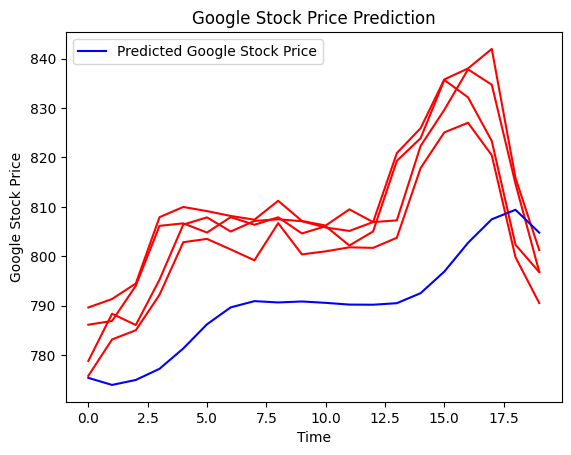

In [43]:
plt.plot(real_stock_price, color = 'red')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()